# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from scipy import stats
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

sns.set()

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')



/Users/justin/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


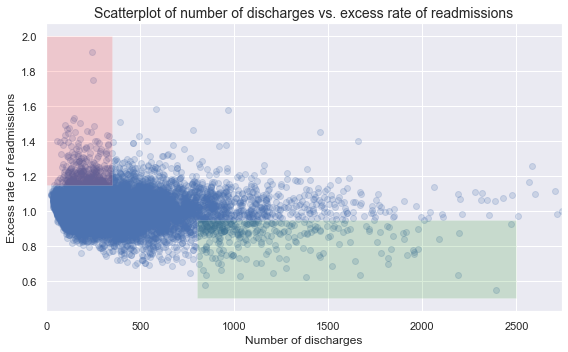

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not?

Do not agree, come to a conclusion by only looking at graph is very dangerous, the report claimed that rate of readmissions is trending down with increasing number of discharges without any statistics test, eg: correlation and its p-value. Same to coming to the conclusion of the shaded red and green area.

The statistics part of the report have biases at picking 100 and 1000 as thershold, should do the assumption and hypothesis test first then tell the result rather than other way around.

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

1. Setup an appropriate hypothesis test.
2. Compute and report the observed significance value (or p-value).
3. Report statistical significance for  𝛼  = .01.
4. Discuss statistical significance and practical significance. Do they differ here? How does  this change your recommendation to the client?
5. Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner.


#### By printing out the info, I realized that 11497 + 81 = 11578, printing out every row which footnote have a value, I realized when footnote = 7.0, all the ratio and rates = null. Hence, going to drop all the rows with footnote = 7.0 and then drop the footnote column.

In [9]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [16]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

clean_hospital_read_df[clean_hospital_read_df.Footnote.notnull()].head(81)


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,TX,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15652,SOUTH TEXAS SURGICAL HOSPITAL,670061,TX,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [17]:
df = clean_hospital_read_df[clean_hospital_read_df.Footnote != 7.0]

In [21]:
df1 = df.drop(['Footnote'], axis=1)

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 11 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(4), int64(2), object(5)
memory usage: 1.1+ MB


To check if: rate of readmissions is trending down with increasing number of discharges, going to first plot it out then applied the correlation test.

In [23]:
import seaborn as sns

<Figure size 1440x1440 with 0 Axes>

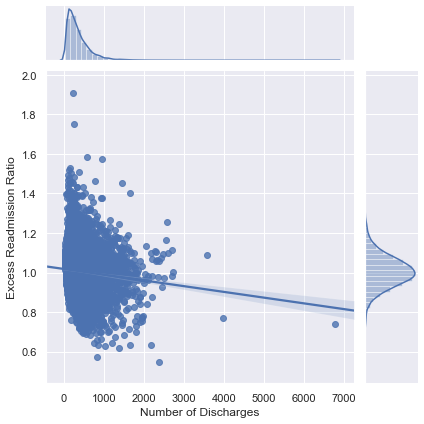

In [69]:
fig = plt.gcf()
fig.set_size_inches(20, 20)

sns.jointplot(x=df1['Number of Discharges'], y=df1['Excess Readmission Ratio'], kind='reg');

<Figure size 1440x1440 with 0 Axes>

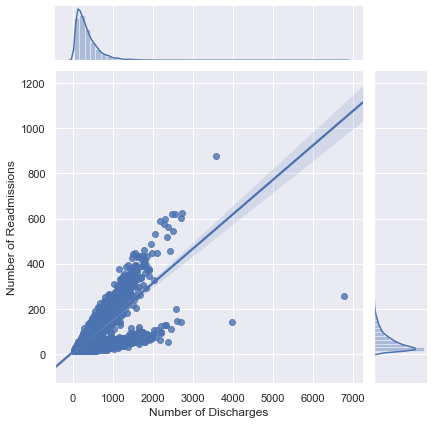

In [72]:
fig = plt.gcf();
fig.set_size_inches(20, 20);

sns.jointplot(x=df1['Number of Discharges'], y=df1['Number of Readmissions'], kind='reg');

<Figure size 1440x1440 with 0 Axes>

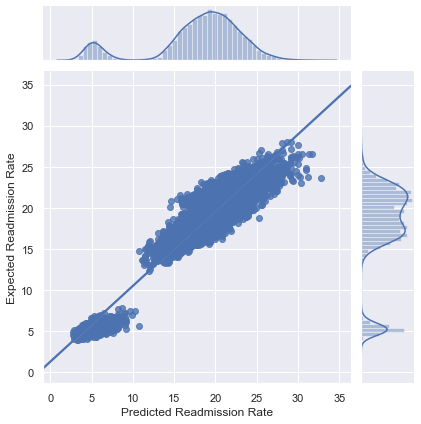

In [73]:
fig = plt.gcf()
fig.set_size_inches(20, 20)

sns.jointplot(x=df1['Predicted Readmission Rate'], y=df1['Expected Readmission Rate'], kind='reg');

In [27]:
from scipy import stats

Performing the hypothesis test step by step
The hypothesis test will let us infer whether the value of the population correlation coefficient ρ is close to 0 or significantly different from 0. We decide this based on the sample correlation coefficient r and the sample size n.
ρ close to 0 : means there is not a significant linear correlation between x and y in the population.
ρ significantly different from 0 : means there is a significant correlation between x and y in the population.
If the test shows that the population correlation coefficient ρ is close to zero, then we say there is insufficient statistical evidence that the correlation between the two variables is significant, i.e., the correlation occurred on account of chance coincidence in the sample and it’s not present in the entire population.
So without further ado, let’s see how we can run the test :
Step 1: Hypotheses specification
We start by specifying the null and alternative hypotheses:
The alternative hypothesis is always what we are trying to prove, in our case, we try to prove that there is a significant correlation between x and y in the population (i.e. ρ ≠ 0).
The null hypothesis is the hypothesis that we are trying to provide evidence against, in our case, we try to provide evidence againt the hypothesis that there is not a significant linear correlation between x and y in the population (i.e. ρ = 0)
Null hypothesis Ho: ρ = 0
Alternative hypothesis Ha: ρ ≠ 0

Since the p-value of the correlation hypothesis test is smaller than alpha 0.01, we can reject the null hypothesis, which means that the correlation here is significant. Hence, there did exist a very weak negative correlation between Number of Discharges and Excess Readmission Ratio.

In [29]:
stats.pearsonr(df1['Number of Discharges'], df1['Excess Readmission Ratio'])

(-0.09739794351079352, 1.2225473776779417e-25)

From the plot and statistics test below, we can see that both of these columns are not normally distributed.

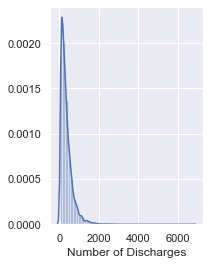

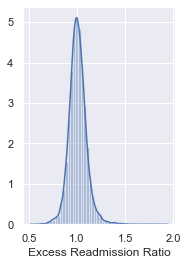

In [36]:
plt.subplot(1,2,1)
sns.distplot(df1['Number of Discharges']);
plt.show()

plt.subplot(1,2,2)
sns.distplot(df1['Excess Readmission Ratio']);
plt.show()

In [38]:
from scipy.stats import shapiro
print(stats.shapiro(df1['Number of Discharges']))
print(stats.shapiro(df1['Excess Readmission Ratio']))

(0.7770348191261292, 0.0)
(0.966856837272644, 4.203895392974451e-45)


#### Since I do not agree with the preliminary analysis by not including the data points between 100 and 1000, I am going to make the hypothesis as:
* H0: Excess Readmission Ratio of discharge < 300  <=   Excess Readmission Ratio of discharge > 300
* H1: Excess Readmission Ratio of discharge < 300  >   Excess Readmission Ratio of discharge > 300

#### First going to do a normality check of the two samples

In [41]:
discharge_300less = df1[df1['Number of Discharges'] <= 300]
discharge_300more = df1[df1['Number of Discharges'] > 300]


From plots and statistics test, we can see that Excess Readmission Ratio of discharge < 300 & Excess Readmission Ratio of discharge > 300 are both not normally distributed, so have to apply Mann-whitney U test, to see which one is higher.

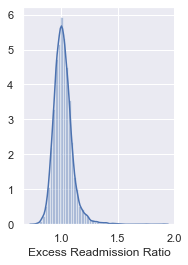

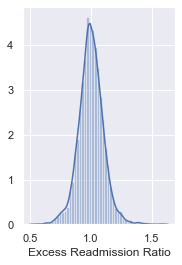

In [42]:
plt.subplot(1,2,1)
sns.distplot(discharge_300less['Excess Readmission Ratio']);
plt.show()

plt.subplot(1,2,2)
sns.distplot(discharge_300more['Excess Readmission Ratio']);
plt.show()

In [43]:
print(stats.shapiro(discharge_300less['Excess Readmission Ratio']))
print(stats.shapiro(discharge_300more['Excess Readmission Ratio']))

(0.9322270154953003, 0.0)
(0.9866033792495728, 3.640452975898202e-22)


P-value << 0.01, reject the null hypothesis, and accept the alternative, which:\
(Excess Readmission Ratio of less and equal than 300 discharges) > (Excess Readmission Ratio of more than 300 discharges)\

Since both of the dataset are not normally distributed, going to use median as an indication rather than mean. The results showed that with less than 300 discharged, the median excess readmission rate is higher.

In [51]:
stats.mannwhitneyu(discharge_300less['Excess Readmission Ratio'],\
                   discharge_300more['Excess Readmission Ratio'],alternative='greater')

MannwhitneyuResult(statistic=17639381.5, pvalue=1.0125878921305877e-11)

In [58]:
print(discharge_300less['Excess Readmission Ratio'].median())
print(discharge_300more['Excess Readmission Ratio'].median())

1.0069499999999998
0.9985


Practical Significance
Image of different sized shoes to illustrate how size matters for practical significance.
Size matters!
While statistical significance relates to whether an effect exists, practical significance refers to the magnitude of the effect. However, no statistical test can tell you whether the effect is large enough to be important in your field of study. Instead, you need to apply your subject area knowledge and expertise to determine whether the effect is big enough to be meaningful in the real world. In other words, is it large enough to care about?

How do you do this? I find that it is helpful to identify the smallest effect size that still has some practical significance. Again, this process requires that you use your knowledge of the subject to make this determination. If your study’s effect size is greater than this smallest meaningful effect, your results are practically significant.

For example, suppose you are evaluating a training program by comparing the test scores of program participants to those who study on their own. Further, we decide that the difference between these two groups must be at least five points to represent a practically meaningful effect size. An effect of 4 points or less is too small to care about.

After performing the study, the analysis finds a statistically significant difference between the two groups. Participants in the study program score an average of 3 points higher on a 100-point test. While these results are statistically significant, the 3-point difference is less than our 5-point threshold. Consequently, our study provides evidence that this effect exists, but it is too small to be meaningful in the real world. The time and money that participants spend on the training program are not worth an average improvement of only 3 points.

## Discuss statistical significance and practical significance. Do they differ here? How does  this change your recommendation to the client?

Though the statisical results did show that there is a different between the excess readmission rate of more than 300 discharges and less than 300 discharges, from a practical point of view not only that a -0.09 correlation between readmission rate and number of discharges is very weak, but the median readmission rate different between the two groups is also very small(0.01). From the practiacal point of view, we cannot really say much about that with a larger amount of number discharged will help reduce the readmission rate.